# Simple RNN (many-to-one 문제)
- 사인파형 시계열을 입력으로 받아 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = np.sin(np.arange(21) * np.pi/4)        # 2 * pi = 360 degree
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

(-0.5, 20.5)

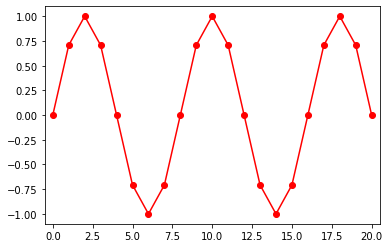

In [5]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)

- X_train, y_train 데이터 생성

In [6]:
len(s)

21

In [7]:
X_train = []
y_train = np.empty(len(s) - 3)

for i in range(len(s) -3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [8]:
# 입력 데이터 갯수, timesteps, input_dim
X_train = np.array(X_train).reshape(-1, 3, 1)
X_train.shape

(18, 3, 1)

In [11]:
X_train[1], y_train[1]

(array([[0.70710678],
        [1.        ],
        [0.70710678]]), 1.2246467991473532e-16)

In [13]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [15]:
model = Sequential([
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile('adam', loss='mse')

- 모델 학습전

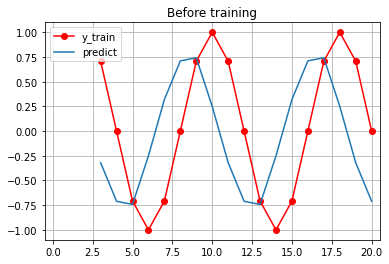

In [21]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='y_train')
plt.plot(np.arange(3, 21), model.predict(X_train), label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend()
plt.title('Before training')
plt.show()

- 모델학습

In [ ]:
hist = model.fit(X_train, y_train, epochs=100)

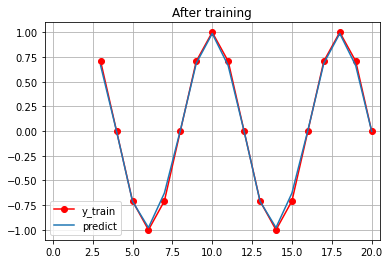

In [23]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='y_train')
plt.plot(np.arange(3, 21), model.predict(X_train), label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend()
plt.title('After training')
plt.show()

In [24]:
model2 = Sequential([
    SimpleRNN(5, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])

model3 = Sequential([
    SimpleRNN(20, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])

In [25]:
model2.compile('adam', loss='mse')
model3.compile('adam', loss='mse')


In [26]:
hist2 = model2.fit(X_train, y_train, epochs=100)
hist3 = model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 769ms/step - loss: 2.2724
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 2.2587
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.2449
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 2.2312
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 2.2176
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 2.2040
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 2.1904
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 2.1769
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 2.1634
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2.1500
Epoch 11/100
1/1 [==============================] - 0s 173ms/step - loss: 2.1367
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 2.1234
Epoch 13/100
1/1 [==============================] - 0s 

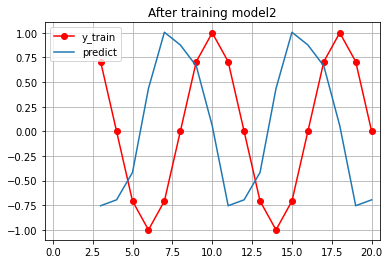

In [31]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='y_train')
plt.plot(np.arange(3, 21), model2.predict(X_train), label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend()
plt.title('After training model2')
plt.show()

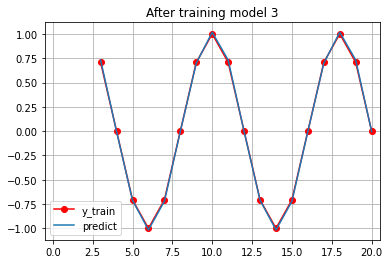

In [30]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='y_train')
plt.plot(np.arange(3, 21), model3.predict(X_train), label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend()
plt.title('After training model 3')
plt.show()